**Задание к дипломной работе по курсу "Python для анализа данных"**


In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np

from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

**1. Загрузите файл HR.csv в pandas dataframe**

In [183]:
df = pd.read_csv('https://raw.githubusercontent.com/ArkadiyDrozdov/pyda-31_Python/main/data/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [184]:
# 1. satisfaction_level​    - Уровень удовлетворенности работой
# 2. last_evaluation ​      - Время с момента последней оценки в годах
# 3. number_projects​       - Количество проектов, выполненных за время работы
# 4. average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
# 5. time_spend_company​    - Стаж работы в компании в годах
# 6. work_accident​         - Происходили ли несчастные случаи на рабочем месте с сотрудником
# 7. left                  ​- Уволился ли сотрудник
# 8. promotion_last_5years​ - Повышался ли сотрудник за последние пять лет
# 9. department ​           - Отдел в котором работает сотрудник
# 10. salary               ​- Относительный уровень зарплаты

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**2. Рассчитайте основные статистики для переменных**

In [186]:
df.describe()
# mean - среднее, 50% - медиана, min - мин, max - макс, std - сред.отклонение

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [187]:
df.mode(numeric_only = False).loc[0] # мода

satisfaction_level         0.1
last_evaluation           0.55
number_project             4.0
average_montly_hours       135
time_spend_company         3.0
Work_accident              0.0
left                       0.0
promotion_last_5years      0.0
department               sales
salary                     low
Name: 0, dtype: object

**3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных**

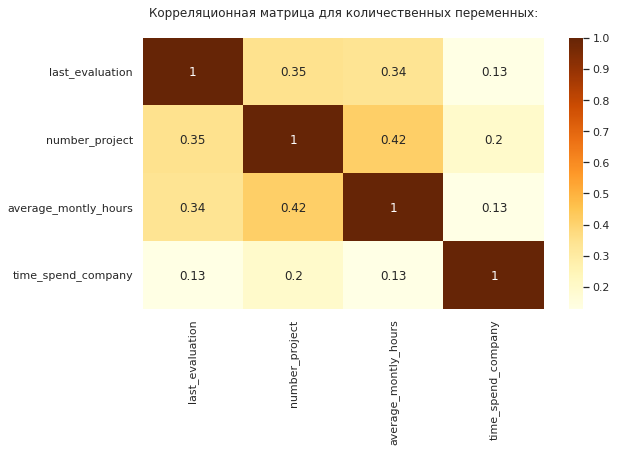

In [188]:
lst     = ['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
df_corr = df[lst].corr()

sns.set(rc = {'figure.figsize':(9,5)})
sns.heatmap(df_corr, cmap = 'YlOrBr', annot = True)
plt.title('Корреляционная матрица для количественных переменных:\n')
plt.show()

**Определите две самые скоррелированные и две наименее скоррелированные переменные**

In [189]:
# Первый вариант:
dct = {}
for i, j in list(itertools.combinations(df_corr, 2)):
    dct[round(df_corr.loc[i, j], 4)] = (i, j)

dict_sorted = dict(sorted(dct.items(), key = lambda x: x[0]))
dict_sorted

{0.1278: ('average_montly_hours', 'time_spend_company'),
 0.1316: ('last_evaluation', 'time_spend_company'),
 0.1968: ('number_project', 'time_spend_company'),
 0.3397: ('last_evaluation', 'average_montly_hours'),
 0.3493: ('last_evaluation', 'number_project'),
 0.4172: ('number_project', 'average_montly_hours')}

In [190]:
print('Ответ:')
print(f'Две наименее скоррелированные переменные: {dict_sorted[min(dict_sorted.keys())]}')
print(f'Две наиболее скоррелированные переменные: {dict_sorted[max(dict_sorted.keys())]}')

Ответ:
Две наименее скоррелированные переменные: ('average_montly_hours', 'time_spend_company')
Две наиболее скоррелированные переменные: ('number_project', 'average_montly_hours')


In [191]:
# Второй вариант:
list_ = list(itertools.combinations(df_corr, 2))

df_   = pd.DataFrame({'corr':      [df_corr.loc[i, j] for i, j in list_], 
                      'variables': [(i,j) for i, j in list_]})
df_   = df_.sort_values(['corr'])
df_

,corr,variables
5,0.127755,"(average_montly_hours, time_spend_company)"
2,0.131591,"(last_evaluation, time_spend_company)"
4,0.196786,"(number_project, time_spend_company)"
1,0.339742,"(last_evaluation, average_montly_hours)"
0,0.349333,"(last_evaluation, number_project)"
3,0.417211,"(number_project, average_montly_hours)"


In [192]:
print('Ответ:')
print(f'Две наименее скоррелированные переменные: {df_.variables.loc[5]}')
print(f'Две наиболее скоррелированные переменные: {df_.variables.loc[3]}')


Ответ:
Две наименее скоррелированные переменные: ('average_montly_hours', 'time_spend_company')
Две наиболее скоррелированные переменные: ('number_project', 'average_montly_hours')


**4. Рассчитайте сколько сотрудников работает в каждом департаменте**

In [193]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

**5. Показать распределение сотрудников по зарплатам**

In [194]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

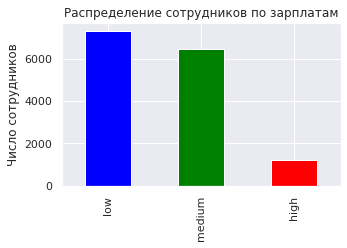

In [195]:
# визуализируем
sns.set(rc = {'figure.figsize':(5,3)})
df.salary.value_counts().plot(kind = 'bar', color = ['blue', 'green', 'red'], stacked = True)
plt.title('Распределение сотрудников по зарплатам')
plt.ylabel('Число сотрудников')
plt.show()

**6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности**

In [196]:
df_salary = df.groupby('department')['salary'].value_counts()
df_salary

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

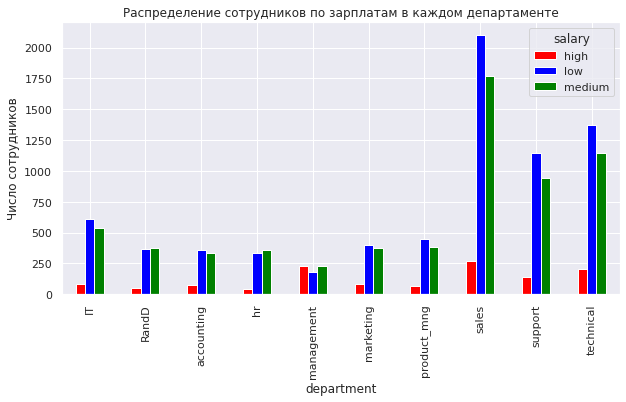

In [197]:
# визуализируем
sns.set(rc = {'figure.figsize':(10,5)})
df_salary.unstack().plot(kind = 'bar', color = ['red', 'blue', 'green'], stacked = False)
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.ylabel('Число сотрудников')
plt.show()

**7. Проверить гипотезу, что сотрудники с ВЫСОКИМ окладом проводят на работе БОЛЬШЕ времени, чем сотрудники с низким окладом**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


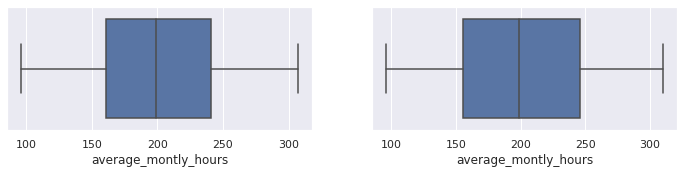

In [198]:
df_high = df.loc[df.salary == 'high'].average_montly_hours
df_low  = df.loc[df.salary == 'low'].average_montly_hours

# проверим сначала, есть ли выбросы
plt.figure(figsize = (12, 5))
plt.subplot(221)
sns.boxplot(df_high)

plt.subplot(222)
sns.boxplot(df_low)
plt.show()
# выбросов нет!

**H0:** сотрудники с высоким окладом проводят на работе **столько же** в среднем часов, сколько и сотрудники с низким окладом.

**H1:** сотрудники с **разным** окладом проводят в среднем **разное** количество часов на работе.

In [199]:
result = st.ttest_ind(df_high, df_low, equal_var = False)
print(f'pvalue: {round(result.pvalue, 2)}')

if (result.pvalue < 0.05):
    # отвергаем нулевую гипотезу:
    print('\nВывод: Cотрудники с НИЗКИМ и ВЫСОКИМ окладом в среднем проводят на работе РАЗНОЕ количество часов в месяц.')  

    # НЕ отвергаем нулевую гипотезу   
else:
    print('\nВывод: Cотрудники с НИЗКИМ и ВЫСОКИМ окладом в среднем проводят на работе ОДИНАКОВОЕ количество часов в месяц.') 

print('\nСреднее количество часов сотрудников на рабочем месте в месяц:')
print(f'- с высоким окладом: {int(df_high.mean())}')
print(f'- с низким  окладом: {int(df_low.mean())}')

pvalue: 0.45

Вывод: Cотрудники с НИЗКИМ и ВЫСОКИМ окладом в среднем проводят на работе ОДИНАКОВОЕ количество часов в месяц.

Среднее количество часов сотрудников на рабочем месте в месяц:
- с высоким окладом: 199
- с низким  окладом: 200


**8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):**
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов




In [200]:
print('Уволившиеся сотрудники:\n')
df_fired_prom = df.loc[(df.left == True) & (df.promotion_last_5years == True)]
print(f'Доля уволившихся сотрудников \nс повышением за последние 5 лет:   {round(100 * len(df_fired_prom) / len(df), 1)}%')
print(f'Средняя степень удовлетворенности: {round(df[df.left == True].satisfaction_level.mean(), 1)}')
print(f'Среднее количество проектов:       {int(df[df.left == True].number_project.mean())}')

print('\n\nНеуволившиеся сотрудники:\n')
df_notfired_prom = df.loc[(df.left == False) & (df.promotion_last_5years == True)]
print(f'Доля неуволившихся сотрудников \nс повышением за последние 5 лет:   {round(100 * len(df_notfired_prom) / len(df), 1)}%')
print(f'Средняя степень удовлетворенности: {round(df[df.left == False].satisfaction_level.mean(), 1)}')
print(f'Среднее количество проектов:       {int(df[df.left == False].number_project.mean())}')

Уволившиеся сотрудники:

Доля уволившихся сотрудников 
с повышением за последние 5 лет:   0.1%
Средняя степень удовлетворенности: 0.4
Среднее количество проектов:       3


Неуволившиеся сотрудники:

Доля неуволившихся сотрудников 
с повышением за последние 5 лет:   2.0%
Средняя степень удовлетворенности: 0.7
Среднее количество проектов:       3


**9. Разделить данные на тестовую и обучающую выборки.**
* Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
* Оценить качество модели на тестовой выборкe.

In [201]:
# столбец df.left - категориальный, поэтому применяем линейный дискриминантный анализ (ЛДА)
lda = LinearDiscriminantAnalysis() # инициализация модели ЛДА

# разделяем выборку на тренировочную и тестовую:
data = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
X_train, X_test, y_train, y_test = train_test_split(data, df.left, test_size = 0.3, random_state = 42)

lda.fit(X_train, y_train)       # обучаем данные
y_predict = lda.predict(X_test) # делаем прогноз на тестовой выборке

# Проверка работы модели LDA:
print(f'Модель дает {round(accuracy_score(y_test, y_predict), 3) * 100} % правильно спрогнозированных выборок среди всех тестовых.')

print('\nПодробные результаты работы LDA модели, предсказывающей уволился ли сотрудник:') 
LDA_result = confusion_matrix(y_test, y_predict)
LDA_result

Модель дает 75.6 % правильно спрогнозированных выборок среди всех тестовых.

Подробные результаты работы LDA модели, предсказывающей уволился ли сотрудник:


array([[3138,  290],
       [ 809,  263]])

In [202]:
# Расшифровка матрицы ошибок:

true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, y_predict).ravel()

print(f'Истино-отрицательное предсказание: {true_negatives}')
print(f'- модель верно предсказала, что {LDA_result[0][0]} сотрудников действительно уволилось.\n')

print(f'Ложно-положительное предсказание:  {false_positives}')
print(f'- модель ошибочно предсказала, что {LDA_result[0][1]} сотрудников осталось на работе. На самом деле они уволились.\n')

print(f'Ложно-отрицательное предсказание:  {false_negatives}')
print(f'- модель ошибочно предсказала, что {LDA_result[1][0]} сотрудников уволилось с работы. А на самом деле они остались на работе.\n')

print(f'Истино-положительное предсказание: {true_positives}')
print(f'- модель верно предсказала, что {LDA_result[1][1]} сотрудников действительно не уволилось.')

Истино-отрицательное предсказание: 3138
- модель верно предсказала, что 3138 сотрудников действительно уволилось.

Ложно-положительное предсказание:  290
- модель ошибочно предсказала, что 290 сотрудников осталось на работе. На самом деле они уволились.

Ложно-отрицательное предсказание:  809
- модель ошибочно предсказала, что 809 сотрудников уволилось с работы. А на самом деле они остались на работе.

Истино-положительное предсказание: 263
- модель верно предсказала, что 263 сотрудников действительно не уволилось.


In [203]:
# коэффициенты дискриминатных линий для двух классов по 7 признаков в каждом
lda.coef_

array([[-4.57738626e+00,  6.13822647e-01, -2.10613368e-01,
         4.55442333e-03,  2.21314862e-01, -1.05033789e+00,
        -1.08559074e+00]])

In [204]:
print(f'Признак № {np.argmin(np.abs(lda.coef_[0])) + 1} наименее значим.')
print(f'Признак № {np.argmax(np.abs(lda.coef_[0])) + 1} наиболее значим.')

Признак № 4 наименее значим.
Признак № 1 наиболее значим.


Text(0, 0.5, 'average_montly_hours')

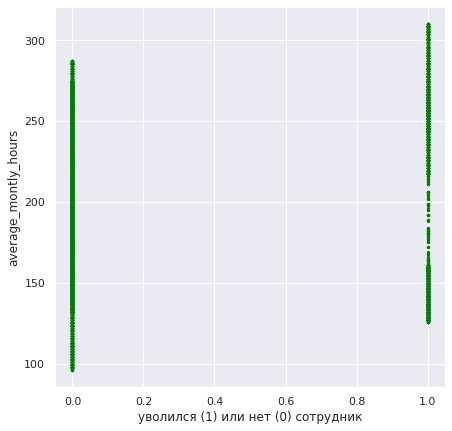

In [205]:
# Признак № 4 - average_montly_hours (Среднее количество часов на рабочем месте в месяц)

sns.set(rc = {'figure.figsize':(7,7)})
plt.scatter(df.left, df.average_montly_hours, s = 5, c = 'green')
plt.xlabel('уволился (1) или нет (0) сотрудник')
plt.ylabel('average_montly_hours')

# Видим, что уволившиеся сотрудники на работе проводили БОЛЬШЕ времени, чем действующие работники.
# Сотрудники, которые не уволились, в месяц проводили наименьшее количество часов.

Text(0, 0.5, 'satisfaction_level')

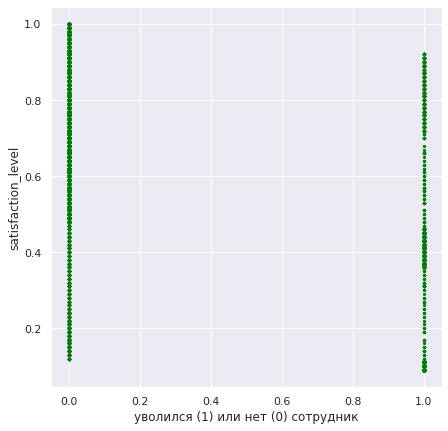

In [206]:
# Признак № 1 - satisfaction_level (уровень удовлетворенности работой)

sns.set(rc = {'figure.figsize':(7,7)})
plt.scatter(x = df.left, y = df.satisfaction_level, s = 5, c = 'green')
plt.xlabel('уволился (1) или нет (0) сотрудник')
plt.ylabel('satisfaction_level')

# Видим, что уровень удовлетворенности работой ВЫШЕ у неуволившихся сотрудников.
# Уволившиеся же сотрудники при этом обладают самым низким уровнем удовлетворенности работой.